In [1]:
import pandas as pd

# Load the SNLI test data (including true labels)
snli_test_path = "/kaggle/input/stanford-natural-language-inference-corpus/snli_1.0_test.csv"
snli_test_df = pd.read_csv(snli_test_path)

# Define file paths for SNLI prediction files
snli_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_snli_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_snli_predictions.csv",
    "albert": "/kaggle/input/albert/albert_snli_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_snli = "/kaggle/working/combined_snli_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_snli_df = pd.DataFrame(columns=columns)

label_mapping = {'entailment': 0, 'neutral': 1, 'contradiction': 2}

# Load and merge the predictions
for model, path in snli_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_snli_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_snli_df['True_Label'] = snli_test_df['gold_label'].map(label_mapping)

# Convert True_Label to integer type
combined_snli_df['True_Label'] = combined_snli_df['True_Label'].astype('Int64')

# Save the combined DataFrame to CSV
combined_snli_df.to_csv(output_csv_path_snli, index=False)

print(f"Combined SNLI predictions with true labels saved to {output_csv_path_snli}")


Combined SNLI predictions with true labels saved to /kaggle/working/combined_snli_df


In [2]:
combined_snli_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.034767,0.962592,0.002641,0.012451,0.927093,0.060457,0.008653,0.947434,0.043913,1
1,0.001921,0.319032,0.679047,0.752766,0.242251,0.004983,0.740332,0.256434,0.003235,0
2,0.998783,0.000764,0.000453,0.000254,0.004494,0.995253,0.004677,0.060481,0.934843,2
3,0.001001,0.997708,0.001291,0.005844,0.990736,0.003419,0.034056,0.956687,0.009257,1
4,0.001080,0.301363,0.697557,0.278348,0.718575,0.003076,0.498761,0.499270,0.001969,0


In [3]:
# Load the ANLI Round 1 test data (including true labels)
mnli_matched_test_path = "/kaggle/input/nli-dataset-for-sentence-understanding/mnli_validation_matched.csv"
mnli_matched_test_df = pd.read_csv(mnli_matched_test_path)

# Define file paths for ANLI Round 1 prediction files
mnli_matched_predictions_paths = {
    "deberta": "/kaggle/input/validation/deberta_mnli_matched_val_predictions.csv",
    "roberta": "/kaggle/input/validation/roberta_mnli_matched_val_predictions.csv",
    "albert": "/kaggle/input/validation/albert_mnli_matched_val_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_mnli_matched = "/kaggle/working/combined_mnli_matched_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_mnli_matched_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in mnli_matched_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_mnli_matched_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_mnli_matched_df['True_Label'] = mnli_matched_test_df['label']

# Save the combined DataFrame to CSV
combined_mnli_matched_df.to_csv(output_csv_path_mnli_matched, index=False)

print(f"Combined MNLI-matched predictions with true labels saved to {output_csv_path_mnli_matched}")


Combined MNLI-matched predictions with true labels saved to /kaggle/working/combined_mnli_matched_df


In [4]:
combined_mnli_matched_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.005164,0.993364,0.001472,0.017844,0.950246,0.031909,0.010844,0.983012,0.006144,1
1,0.999153,0.000526,0.000321,0.001413,0.002030,0.996557,0.005388,0.007536,0.987076,2
2,0.000989,0.044792,0.954219,0.954781,0.042249,0.002970,0.853862,0.143483,0.002655,0
3,0.994965,0.004808,0.000228,0.000343,0.003511,0.996146,0.004128,0.070757,0.925115,2
4,0.999657,0.000220,0.000123,0.000079,0.000496,0.999425,0.003864,0.029262,0.966875,2


In [5]:
# Load the ANLI Round 1 test data (including true labels)
mnli_mismatched_test_path = "/kaggle/input/nli-dataset-for-sentence-understanding/mnli_validation_mismatched.csv"
mnli_mismatched_test_df = pd.read_csv(mnli_mismatched_test_path)

# Define file paths for ANLI Round 1 prediction files
mnli_mismatched_predictions_paths = {
    "deberta": "/kaggle/input/validation/deberta_mnli_mismatched_val_predictions.csv",
    "roberta": "/kaggle/input/validation/roberta_mnli_mismatched_val_predictions.csv",
    "albert": "/kaggle/input/validation/albert_mnli_mismatched_val_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_mnli_mismatched = "/kaggle/working/combined_mnli_mismatched_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_mnli_mismatched_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in mnli_mismatched_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_mnli_mismatched_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_mnli_mismatched_df['True_Label'] = mnli_mismatched_test_df['label']

# Save the combined DataFrame to CSV
combined_mnli_mismatched_df.to_csv(output_csv_path_mnli_mismatched, index=False)

print(f"Combined MNLI-mismatched predictions with true labels saved to {output_csv_path_mnli_mismatched}")


Combined MNLI-mismatched predictions with true labels saved to /kaggle/working/combined_mnli_mismatched_df


In [6]:
combined_mnli_mismatched_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.999667,0.000160,0.000173,0.000068,0.000402,0.999529,0.000894,0.003787,0.995318,2
1,0.998119,0.000962,0.000919,0.000183,0.001511,0.998306,0.006421,0.010224,0.983355,2
2,0.000552,0.004809,0.994639,0.986062,0.012020,0.001918,0.975041,0.023354,0.001605,0
3,0.827653,0.171961,0.000386,0.000478,0.270953,0.728569,0.001722,0.796122,0.202156,2
4,0.000292,0.002875,0.996833,0.975167,0.021904,0.002929,0.965952,0.032748,0.001300,0


In [7]:
# Load the ANLI Round 1 test data (including true labels)
anli_r1_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r1.csv"
anli_r1_test_df = pd.read_csv(anli_r1_test_path)

# Define file paths for ANLI Round 1 prediction files
anli_r1_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r1_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r1_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r1_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r1 = "/kaggle/working/combined_anli_r1_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r1_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r1_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r1_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r1_df['True_Label'] = anli_r1_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r1_df.to_csv(output_csv_path_anli_r1, index=False)

print(f"Combined ANLI Round 1 predictions with true labels saved to {output_csv_path_anli_r1}")


Combined ANLI Round 1 predictions with true labels saved to /kaggle/working/combined_anli_r1_df


In [8]:
combined_anli_r1_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.015388,0.976305,0.008307,0.996714,0.000376,0.002910,0.322974,0.667628,0.009398,0
1,0.224603,0.501549,0.273848,0.875720,0.000724,0.123556,0.998526,0.000604,0.000869,0
2,0.006642,0.976690,0.016669,0.999484,0.000330,0.000186,0.783352,0.212241,0.004407,0
3,0.966494,0.032235,0.001272,0.000686,0.998181,0.001133,0.002134,0.989523,0.008343,1
4,0.880736,0.028293,0.090971,0.000378,0.000197,0.999425,0.023283,0.013253,0.963464,2


In [9]:
# Load the ANLI Round 2 test data (including true labels)
anli_r2_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r2.csv"
anli_r2_test_df = pd.read_csv(anli_r2_test_path)

# Define file paths for ANLI Round 2 prediction files
anli_r2_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r2_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r2_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r2_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r2 = "/kaggle/working/combined_anli_r2_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r2_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r2_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r2_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r2_df['True_Label'] = anli_r2_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r2_df.to_csv(output_csv_path_anli_r2, index=False)

print(f"Combined ANLI Round 2 predictions with true labels saved to {output_csv_path_anli_r2}")


Combined ANLI Round 2 predictions with true labels saved to /kaggle/working/combined_anli_r2_df


In [10]:
combined_anli_r2_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.001309,0.029617,0.969075,0.999506,0.000264,0.000230,0.863365,0.133388,0.003246,0
1,0.724144,0.273676,0.002180,0.026951,0.054230,0.918819,0.072900,0.904344,0.022756,1
2,0.071604,0.917894,0.010503,0.001282,0.998108,0.000610,0.027402,0.972218,0.000380,0
3,0.066162,0.929179,0.004659,0.007091,0.992694,0.000215,0.632171,0.365194,0.002635,1
4,0.906199,0.089873,0.003928,0.006259,0.989432,0.004309,0.064109,0.234642,0.701249,2


In [11]:
# Load the ANLI Round 3 test data (including true labels)
anli_r3_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r3.csv"
anli_r3_test_df = pd.read_csv(anli_r3_test_path)

# Define file paths for ANLI Round 2 prediction files
anli_r3_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r3_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r3_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r3_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r3 = "/kaggle/working/combined_anli_r3_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r3_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r3_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r3_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r3_df['True_Label'] = anli_r3_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r3_df.to_csv(output_csv_path_anli_r3, index=False)

print(f"Combined ANLI Round 3 predictions with true labels saved to {output_csv_path_anli_r3}")


Combined ANLI Round 3 predictions with true labels saved to /kaggle/working/combined_anli_r3_df


In [12]:
combined_anli_r3_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.005921,0.960529,0.033551,0.022959,0.976533,0.000509,0.001848,0.998084,0.000067,0
1,0.009586,0.934714,0.055700,0.999611,0.000205,0.000185,0.951772,0.048075,0.000153,0
2,0.003428,0.976393,0.020179,0.002020,0.997897,0.000083,0.001014,0.998984,0.000002,0
3,0.004633,0.023985,0.971382,0.974441,0.024459,0.001100,0.996749,0.000989,0.002262,0
4,0.017428,0.633695,0.348877,0.984416,0.011166,0.004419,0.000518,0.128416,0.871066,0


In [13]:
# Check for missing values
missing_values_anli1 = combined_anli_r1_df.isnull().sum()

missing_values_anli2 = combined_anli_r2_df.isnull().sum()

missing_values_anli3 = combined_anli_r3_df.isnull().sum()

missing_values_snli = combined_snli_df.isnull().sum()

missing_values_mnli_matched = combined_mnli_matched_df.isnull().sum()

missing_values_mnli_mismatched = combined_mnli_mismatched_df.isnull().sum()

In [14]:
missing_values_anli1

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [15]:
missing_values_anli2

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [16]:
missing_values_anli3

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [17]:
missing_values_snli

Deberta_Entailment         0
Deberta_Neutral            0
Deberta_Contradiction      0
Roberta_Entailment         0
Roberta_Neutral            0
Roberta_Contradiction      0
Albert_Entailment          0
Albert_Neutral             0
Albert_Contradiction       0
True_Label               176
dtype: int64

In [18]:
missing_values_mnli_matched

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [19]:
missing_values_mnli_mismatched

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [20]:
combined_snli_df.dropna(subset=['True_Label'], inplace=True)


In [21]:
# Verify missing values again after removal
missing_values_snli_after_removal = combined_snli_df.isnull().sum()
print(missing_values_snli_after_removal)


Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64


In [22]:
combined_snli_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9824 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Deberta_Entailment     9824 non-null   float64
 1   Deberta_Neutral        9824 non-null   float64
 2   Deberta_Contradiction  9824 non-null   float64
 3   Roberta_Entailment     9824 non-null   float64
 4   Roberta_Neutral        9824 non-null   float64
 5   Roberta_Contradiction  9824 non-null   float64
 6   Albert_Entailment      9824 non-null   float64
 7   Albert_Neutral         9824 non-null   float64
 8   Albert_Contradiction   9824 non-null   float64
 9   True_Label             9824 non-null   Int64  
dtypes: Int64(1), float64(9)
memory usage: 853.8 KB


In [23]:
from sklearn.model_selection import train_test_split

# Function to split data into training and validation sets
def split_data(df):
    X = df.drop(columns=['True_Label'])  # Features: the model predictions
    y = df['True_Label']  # Target: the true labels
    # Splitting the dataset into training (80%) and validation (20%) sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_val, y_train, y_val

# Splitting MNLI Matched, MNLI Mismatched, and ANLI Rounds 1, 2, 3
X_train_mnli_matched, X_val_mnli_matched, y_train_mnli_matched, y_val_mnli_matched = split_data(combined_mnli_matched_df)
X_train_mnli_mismatched, X_val_mnli_mismatched, y_train_mnli_mismatched, y_val_mnli_mismatched = split_data(combined_mnli_mismatched_df)
X_train_anli_r1, X_val_anli_r1, y_train_anli_r1, y_val_anli_r1 = split_data(combined_anli_r1_df)
X_train_anli_r2, X_val_anli_r2, y_train_anli_r2, y_val_anli_r2 = split_data(combined_anli_r2_df)
X_train_anli_r3, X_val_anli_r3, y_train_anli_r3, y_val_anli_r3 = split_data(combined_anli_r3_df)
X_train_snli, X_val_snli, y_train_snli, y_val_snli = split_data(combined_snli_df)


# Print the sizes of the training and validation sets
print(f"MNLI Matched Training set size: {X_train_mnli_matched.shape[0]}, Validation set size: {X_val_mnli_matched.shape[0]}")
print(f"MNLI Mismatched Training set size: {X_train_mnli_mismatched.shape[0]}, Validation set size: {X_val_mnli_mismatched.shape[0]}")
print(f"ANLI Round 1 Training set size: {X_train_anli_r1.shape[0]}, Validation set size: {X_val_anli_r1.shape[0]}")
print(f"ANLI Round 2 Training set size: {X_train_anli_r2.shape[0]}, Validation set size: {X_val_anli_r2.shape[0]}")
print(f"ANLI Round 3 Training set size: {X_train_anli_r3.shape[0]}, Validation set size: {X_val_anli_r3.shape[0]}")
print(f"SNLI Training set size: {X_train_snli.shape[0]}, Validation set size: {X_val_snli.shape[0]}")


MNLI Matched Training set size: 7852, Validation set size: 1963
MNLI Mismatched Training set size: 7865, Validation set size: 1967
ANLI Round 1 Training set size: 800, Validation set size: 200
ANLI Round 2 Training set size: 800, Validation set size: 200
ANLI Round 3 Training set size: 960, Validation set size: 240
SNLI Training set size: 7859, Validation set size: 1965


In [48]:
# Combine all the datasets into one DataFrame
combined_all_tasks_df = pd.concat([
    combined_snli_df,
    combined_mnli_matched_df,
    combined_mnli_mismatched_df,
    combined_anli_r1_df,
    combined_anli_r2_df,
    combined_anli_r3_df
], ignore_index=True)

# Split the combined dataset
X_train_all, X_val_all, y_train_all, y_val_all = split_data(combined_all_tasks_df)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
import numpy as np


# Function to tune and train the logistic regression meta-model
def tune_and_train_meta_model(X_train, y_train, task_name, model_name):
    """
    Tuning and training logistic regression meta-model with GridSearchCV.

    Parameters:
    - X_train: Training features (predictions of base models)
    - y_train: True labels for the training data
    - task_name: A string describing the dataset or task (e.g., 'SNLI', 'MNLI Matched')
    - model_name: A string describing the model being tuned and trained

    Returns:
    - best_model: The best logistic regression model found by GridSearchCV.
    """
    print(f"Starting hyperparameter tuning for {task_name} using {model_name}...")

    # Define the logistic regression model with a fixed random state for reproducibility
    meta_model = LogisticRegression(random_state=42)

    # Define the hyperparameters grid to search
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs'],
        'penalty': ['l2']
    }

    # Setup GridSearchCV to search for the best hyperparameters
    grid_search = GridSearchCV(meta_model, param_grid, cv=5, scoring='accuracy', verbose=1)

    # Fit GridSearchCV to the training data
    grid_search.fit(X_train, y_train)

    # Calculate the best loss
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_loss = log_loss(y_train, best_model.predict_proba(X_train))

    # Print the best parameters, score, and loss
    print(f"Best parameters for {task_name} using {model_name}: {grid_search.best_params_}")
    print(f"Best score for {task_name} using {model_name}: {best_score}")
    print(f"Best loss for {task_name} using {model_name}: {best_loss}\n")

    return best_model

In [50]:
best_model_snli = tune_and_train_meta_model(X_train_snli, y_train_snli, "SNLI", "Logistic Regression")

Starting hyperparameter tuning for SNLI using Logistic Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for SNLI using Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best score for SNLI using Logistic Regression: 0.926961887130448
Best loss for SNLI using Logistic Regression: 0.22371290691174736



In [25]:
best_model_mnli_matched = tune_and_train_meta_model(X_train_mnli_matched, y_train_mnli_matched, "MNLI_matched", "Logistic Regression")

Starting hyperparameter tuning for MNLI_matched using Logistic Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for MNLI_matched using Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score for MNLI_matched using Logistic Regression: 0.9183634100556665
Best loss for MNLI_matched using Logistic Regression: 0.24568533433621007



In [26]:
best_model_mnli_mismatched = tune_and_train_meta_model(X_train_mnli_mismatched, y_train_mnli_mismatched, "MNLI_mismatched", "Logistic Regression")

Starting hyperparameter tuning for MNLI_mismatched using Logistic Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for MNLI_mismatched using Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best score for MNLI_mismatched using Logistic Regression: 0.9168467895740623
Best loss for MNLI_mismatched using Logistic Regression: 0.28140126212007255



In [27]:
best_model_anli_r1 = tune_and_train_meta_model(X_train_anli_r1, y_train_anli_r1, "ANLI round 1", "Logistic Regression")

Starting hyperparameter tuning for ANLI round 1 using Logistic Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for ANLI round 1 using Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score for ANLI round 1 using Logistic Regression: 0.765
Best loss for ANLI round 1 using Logistic Regression: 0.5928664549952005



In [28]:
best_model_anli_r2 = tune_and_train_meta_model(X_train_anli_r2, y_train_anli_r2, "ANLI round 2", "Logistic Regression")

Starting hyperparameter tuning for ANLI round 2 using Logistic Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for ANLI round 2 using Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best score for ANLI round 2 using Logistic Regression: 0.675
Best loss for ANLI round 2 using Logistic Regression: 0.752836687143394



In [29]:
best_model_anli_r3 = tune_and_train_meta_model(X_train_anli_r3, y_train_anli_r3, "ANLI round 3", "Logistic Regression")

Starting hyperparameter tuning for ANLI round 3 using Logistic Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for ANLI round 3 using Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score for ANLI round 3 using Logistic Regression: 0.6697916666666667
Best loss for ANLI round 3 using Logistic Regression: 0.7517502313492069



In [51]:
best_model_all = tune_and_train_meta_model(X_train_all, y_train_all, "Combined all tasks", "Logistic Regression")

Starting hyperparameter tuning for Combined all tasks using Logistic Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Combined all tasks using Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best score for Combined all tasks using Logistic Regression: 0.8972299529442866
Best loss for Combined all tasks using Logistic Regression: 0.3084754511116011



In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to visualize a classic confusion matrix with blue/white heatmap
def plot_confusion_matrix(cm, task_name):
    """
    Plot a confusion matrix with a blue/white heatmap.

    Parameters:
    - cm: Confusion matrix data.
    - task_name: The name of the task to label the plot.
    """
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix for {task_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

Accuracy on SNLI: 93.13%
Loss on SNLI: 0.2127



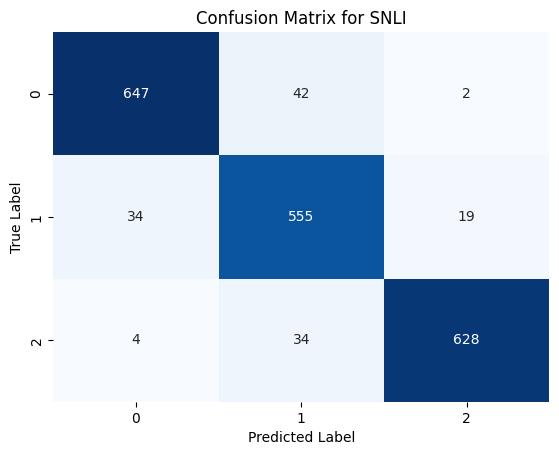

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# Function to evaluate the model on the validation set, create the model, and return predictions for confusion matrix
def evaluate_model(X_train, y_train, X_val, y_val, task_name):
    """
    Evaluate the model on the validation set, print accuracy and loss, and return the trained model and predictions.

    Parameters:
    - X_train: Training features (predictions of base models).
    - y_train: True labels for the training data.
    - X_val: Validation features (predictions of base models).
    - y_val: True labels for the validation data.
    - task_name: Name of the task/dataset.

    Returns:
    - y_pred: Predictions on the validation set (for confusion matrix).
    - model: Trained logistic regression model.
    """
    # Create and train a logistic regression model
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)

    # Generate predictions on the validation set
    y_pred = model.predict(X_val)

    # Calculate accuracy and loss
    accuracy = accuracy_score(y_val, y_pred)
    loss = log_loss(y_val, model.predict_proba(X_val))

    print(f"Accuracy on {task_name}: {accuracy * 100:.2f}%")
    print(f"Loss on {task_name}: {loss:.4f}\n")

    return y_pred, model  # Return predictions for confusion matrix and the trained model


# Use the evaluate_model function to get predictions and trained models
y_pred_snli, trained_model_snli = evaluate_model(X_train_snli, y_train_snli, X_val_snli, y_val_snli, "SNLI")

# Generate the confusion matrix
confusion_mtx_snli = confusion_matrix(y_val_snli, y_pred_snli)

# Plot the confusion matrix
plot_confusion_matrix(confusion_mtx_snli, "SNLI")

Accuracy on MNLI Matched: 92.00%
Loss on MNLI Matched: 0.2240



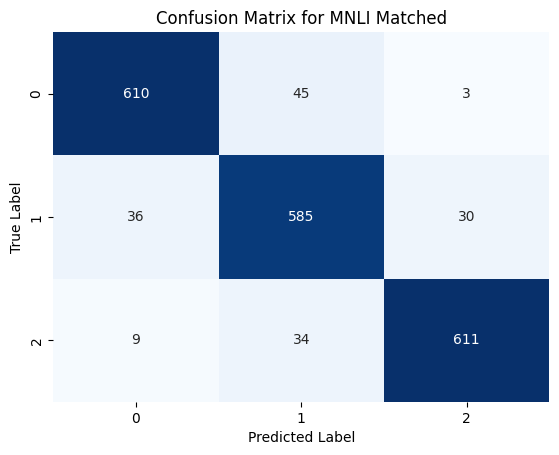

In [39]:
# Repeat for other tasks
y_pred_mnli_matched, trained_model_mnli_matched = evaluate_model(
    X_train_mnli_matched, y_train_mnli_matched, X_val_mnli_matched, y_val_mnli_matched, "MNLI Matched"
)
confusion_mtx_mnli_matched = confusion_matrix(y_val_mnli_matched, y_pred_mnli_matched)
plot_confusion_matrix(confusion_mtx_mnli_matched, "MNLI Matched")

Accuracy on MNLI Mismatched: 91.61%
Loss on MNLI Mismatched: 0.2512



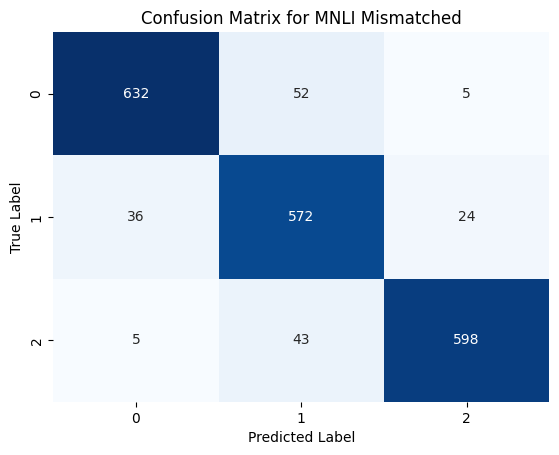

In [40]:
y_pred_mnli_mismatched, trained_model_mnli_mismatched = evaluate_model(
    X_train_mnli_mismatched, y_train_mnli_mismatched, X_val_mnli_mismatched, y_val_mnli_mismatched, "MNLI Mismatched"
)
confusion_mtx_mnli_mismatched = confusion_matrix(y_val_mnli_mismatched, y_pred_mnli_mismatched)
plot_confusion_matrix(confusion_mtx_mnli_mismatched, "MNLI Mismatched")

Accuracy on ANLI Round 1: 70.50%
Loss on ANLI Round 1: 0.7057



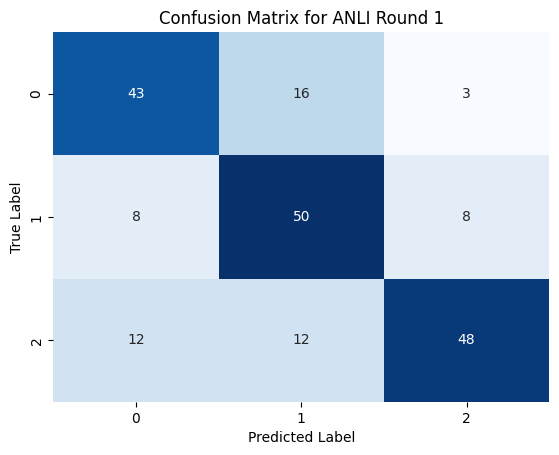

In [41]:
y_pred_anli_r1, trained_model_anli_r1 = evaluate_model(
    X_train_anli_r1, y_train_anli_r1, X_val_anli_r1, y_val_anli_r1, "ANLI Round 1"
)
confusion_mtx_anli_r1 = confusion_matrix(y_val_anli_r1, y_pred_anli_r1)
plot_confusion_matrix(confusion_mtx_anli_r1, "ANLI Round 1")

Accuracy on ANLI Round 2: 73.50%
Loss on ANLI Round 2: 0.7233



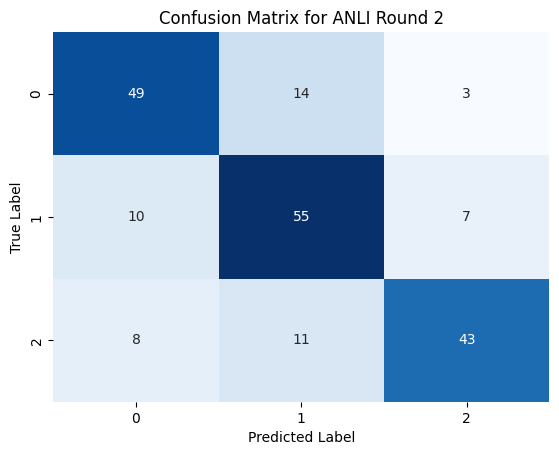

In [42]:
y_pred_anli_r2, trained_model_anli_r2 = evaluate_model(
    X_train_anli_r2, y_train_anli_r2, X_val_anli_r2, y_val_anli_r2, "ANLI Round 2"
)
confusion_mtx_anli_r2 = confusion_matrix(y_val_anli_r2, y_pred_anli_r2)
plot_confusion_matrix(confusion_mtx_anli_r2, "ANLI Round 2")

Accuracy on ANLI Round 3: 69.58%
Loss on ANLI Round 3: 0.6678



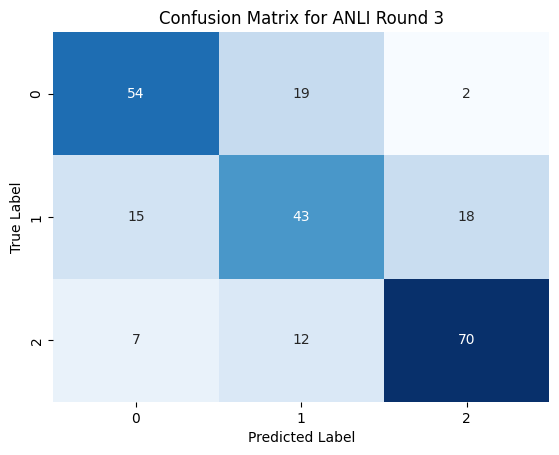

In [43]:
y_pred_anli_r3, trained_model_anli_r3 = evaluate_model(
    X_train_anli_r3, y_train_anli_r3, X_val_anli_r3, y_val_anli_r3, "ANLI Round 3"
)
confusion_mtx_anli_r3 = confusion_matrix(y_val_anli_r3, y_pred_anli_r3)
plot_confusion_matrix(confusion_mtx_anli_r3, "ANLI Round 3")

Accuracy on All Tasks Combined: 89.32%
Loss on All Tasks Combined: 0.3069



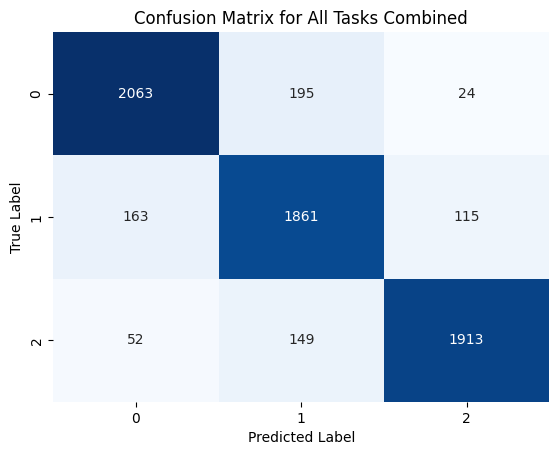

In [46]:
# Evaluate the model on the combined dataset
y_pred_all, trained_model_all = evaluate_model(X_train_all, y_train_all, X_val_all, y_val_all, "All Tasks Combined")

# Generate the confusion matrix for the combined dataset
confusion_mtx_all = confusion_matrix(y_val_all, y_pred_all)

# Plot the confusion matrix for the combined dataset
plot_confusion_matrix(confusion_mtx_all, "All Tasks Combined")

In [47]:
import joblib

# Assuming 'best_model' is your trained XGBoost model from the last training session
joblib_file = "/kaggle/working/LR_simple.pkl"  # Define your own path to save the file
joblib.dump(evaluate_model, joblib_file)
print("XGBoost model saved successfully at:", joblib_file)

XGBoost model saved successfully at: /kaggle/working/LR_simple.pkl
